In [52]:
%pylab inline
import os
import tensorflow as tf
from keras.layers import *
from keras.models import Sequential
from keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy as np
os.environ['CUDA_VISIBLE_DEVICES'] = '0'

Populating the interactive namespace from numpy and matplotlib


In [53]:
print(tf.config.list_physical_devices())
physical_devices = tf.config.list_physical_devices('GPU')
print("Num GPUs:", len(physical_devices))

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'), PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
Num GPUs: 1


In [54]:
#loading in the data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [55]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train = x_train/255
x_test = x_test/255

In [56]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28,1)
input_shape = (28,28,1)

In [57]:
#model 
def create_model(dropout=False, ks=3, f1=32, f2=64):
#testing first with dropout
    model = Sequential()
    model.add(Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=input_shape))
    model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    if dropout:
        model.add(Dropout(0.25))
        model.add(Flatten())
        model.add(Dense(128, activation='relu'))
        model.add(Dropout(0.5))
        model.add(Dense(10, activation='softmax'))
    else:
       model.add(Flatten())
       model.add(Dense(128, activation='relu'))
       model.add(Dense(10, activation='softmax'))
    model.compile('adam', 'sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

In [58]:
m1 = create_model(dropout=True, ks=3, f1=32, f2=64)
training_model_1 = m1.fit(x_train, y_train, batch_size=256, epochs=40, verbose=0)

In [59]:
m2 = create_model(dropout=True, ks=5, f1=32, f2=64)
training_model_2 = m2.fit(x_train, y_train, batch_size=256, epochs=40, verbose=0)

In [60]:
m3 = create_model(dropout=False, ks=5, f1=32, f2=64)
training_model_3 = m3.fit(x_train, y_train, batch_size=256, epochs=40, verbose=0)

In [61]:
m4 = create_model(dropout=True, ks=3, f1=64, f2=128)
training_model_4 = m4.fit(x_train, y_train, batch_size=256, epochs=40, verbose=0)

In [62]:
#training with noise
x_noise = np.random.uniform(size=x_train.shape)
y_noise = np.random.randint(0, 10, size=y_train.shape)

In [63]:
m5 = create_model(dropout=False, ks=3, f1=32, f2=64)
training_model_5 = m5.fit(x_noise, y_noise, batch_size=256, epochs=40, verbose=0)

In [72]:
m6 = create_model(dropout=True, ks=3, f1=32, f2=64)
training_model_6 = m6.fit(x_train, y_noise, batch_size=256, epochs=40, verbose=0)

In [64]:
# plotting settings
figsize(16,8)

Text(0.5, 1.0, 'Accuracy')

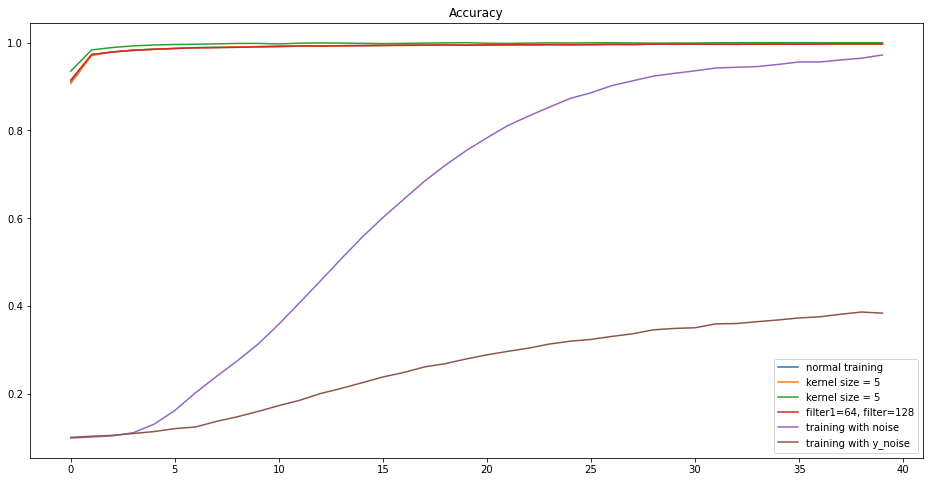

In [73]:
#plotting accuracy
plt.plot(training_model_1.history['accuracy'], label="normal training")
plt.plot(training_model_2.history['accuracy'], label="kernel size = 5")
plt.plot(training_model_3.history['accuracy'], label="kernel size = 5")
plt.plot(training_model_4.history['accuracy'], label="filter1=64, filter=128")
plt.plot(training_model_5.history['accuracy'], label="training with noise")
plt.plot(training_model_6.history['accuracy'], label="training with y_noise")
plt.legend()
plt.title("Accuracy")

Text(0.5, 1.0, 'loss')

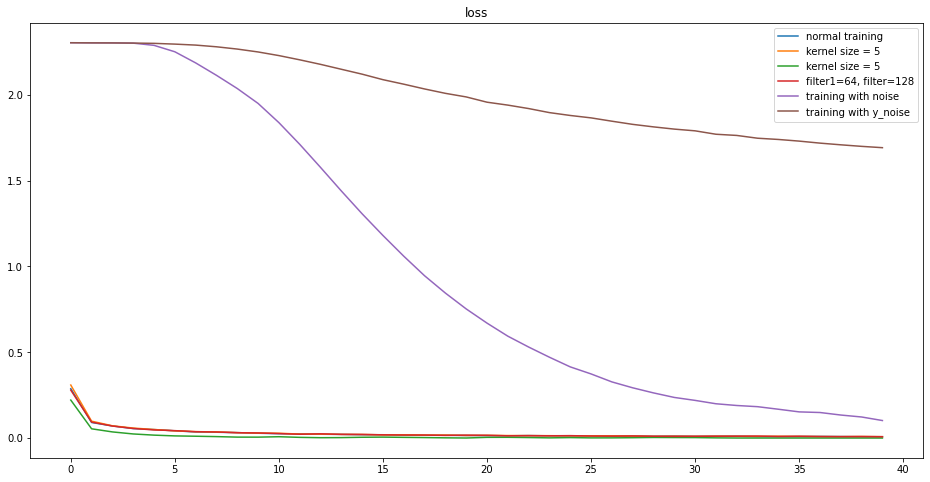

In [74]:
#plotting loss
plt.plot(training_model_1.history['loss'], label="normal training")
plt.plot(training_model_2.history['loss'], label="kernel size = 5")
plt.plot(training_model_3.history['loss'], label="kernel size = 5")
plt.plot(training_model_4.history['loss'], label="filter1=64, filter=128")
plt.plot(training_model_5.history['loss'], label="training with noise")
plt.plot(training_model_6.history['loss'], label="training with y_noise")
plt.legend()
plt.title("loss")

In [67]:
#Papers I Read on the Subject
"""
https://ai.googleblog.com/2021/03/a-new-lens-on-understanding.html
https://proceedings.neurips.cc/paper/2017/file/10ce03a1ed01077e3e289f3e53c72813-Paper.pdf
https://www.cs.toronto.edu/~lczhang/321/notes/notes09.pdf
"""

'\nhttps://ai.googleblog.com/2021/03/a-new-lens-on-understanding.html\nhttps://proceedings.neurips.cc/paper/2017/file/10ce03a1ed01077e3e289f3e53c72813-Paper.pdf\nhttps://www.cs.toronto.edu/~lczhang/321/notes/notes09.pdf\n'